In [3]:
column_mapping = {
    "Index": None,  # not needed
    "UsingIP": "having_IP_Address",
    "LongURL": "URL_Length",
    "ShortURL": "Shortining_Service",
    "Symbol@": "having_At_Symbol",
    "Redirecting//": "double_slash_redirecting",
    "PrefixSuffix-": "Prefix_Suffix",
    "SubDomains": "having_Sub_Domain",
    "HTTPS": "SSLfinal_State",
    "DomainRegLen": "Domain_registeration_length",
    "Favicon": "Favicon",
    "NonStdPort": "port",
    "HTTPSDomainURL": "HTTPS_token",
    "RequestURL": "Request_URL",
    "AnchorURL": "URL_of_Anchor",
    "LinksInScriptTags": "Links_in_tags",
    "ServerFormHandler": "SFH",
    "InfoEmail": "Submitting_to_email",
    "AbnormalURL": "Abnormal_URL",
    "WebsiteForwarding": "Redirect",
    "StatusBarCust": "on_mouseover",
    "DisableRightClick": "RightClick",
    "UsingPopupWindow": "popUpWidnow",
    "IframeRedirection": "Iframe",
    "AgeofDomain": "age_of_domain",
    "DNSRecording": "DNSRecord",
    "WebsiteTraffic": "web_traffic",
    "PageRank": "Page_Rank",
    "GoogleIndex": "Google_Index",
    "LinksPointingToPage": "Links_pointing_to_page",
    "StatsReport": "Statistical_report",
    "class": "Result"
}


In [4]:
import pandas as pd

# Load both datasets
df_kaggle = pd.read_csv("dataset/phishing_kaggle.csv")
df_uci = pd.read_csv("dataset/phishing_uci.csv")

# Drop unnecessary columns (like Index)
df_kaggle = df_kaggle.drop(columns=["Index"], errors="ignore")

# Rename Kaggle columns to match UCI style
df_kaggle = df_kaggle.rename(columns=column_mapping)

# Ensure both have same columns in same order
df_kaggle = df_kaggle[df_uci.columns]

# Combine them
df_combined = pd.concat([df_uci, df_kaggle], ignore_index=True)

# Save
df_combined.to_csv("dataset/phishing_combined.csv", index=False)
print("Unified dataset saved as phishing_combined.csv")


Unified dataset saved as phishing_combined.csv


In [5]:
print(df_combined.shape)
print(df_combined.head())


(22109, 31)
  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0             b'-1'       b'1'               b'1'             b'1'   
1              b'1'       b'1'               b'1'             b'1'   
2              b'1'       b'0'               b'1'             b'1'   
3              b'1'       b'0'               b'1'             b'1'   
4              b'1'       b'0'              b'-1'             b'1'   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                    b'-1'         b'-1'             b'-1'          b'-1'   
1                     b'1'         b'-1'              b'0'           b'1'   
2                     b'1'         b'-1'             b'-1'          b'-1'   
3                     b'1'         b'-1'             b'-1'          b'-1'   
4                     b'1'         b'-1'              b'1'           b'1'   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                       b

In [6]:
# 🔹 Convert byte strings (b'1') into normal integers
df_combined = df_combined.applymap(
    lambda x: int(x.decode()) if isinstance(x, bytes) else int(x)
)

# Verify again
print(df_combined.dtypes.head())
print(df_combined.head())


C:\Users\Hani Ravindra\AppData\Local\Temp\ipykernel_9984\3862768507.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combined = df_combined.applymap(


ValueError: invalid literal for int() with base 10: "b'-1'"

In [7]:
# Clean values: handle both "b'-1'" strings and normal ints
def clean_value(x):
    if isinstance(x, bytes):        # real byte string
        return int(x.decode())
    if isinstance(x, str) and x.startswith("b'"):  # string that looks like b'-1'
        return int(x.strip("b'"))  
    return int(x)                   # already an int

df_combined = df_combined.applymap(clean_value)

# Verify
print(df_combined.dtypes.head())
print(df_combined.head())


C:\Users\Hani Ravindra\AppData\Local\Temp\ipykernel_9984\2181092977.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_combined = df_combined.applymap(clean_value)


having_IP_Address           int64
URL_Length                  int64
Shortining_Service          int64
having_At_Symbol            int64
double_slash_redirecting    int64
dtype: object
   having_IP_Address  URL_Length  Shortining_Service  having_At_Symbol  \
0                 -1           1                   1                 1   
1                  1           1                   1                 1   
2                  1           0                   1                 1   
3                  1           0                   1                 1   
4                  1           0                  -1                 1   

   double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  SSLfinal_State  \
0                        -1             -1                 -1              -1   
1                         1             -1                  0               1   
2                         1             -1                 -1              -1   
3                         1             -1     

In [8]:
# Save cleaned dataset back to CSV
df_combined.to_csv("dataset/phishing_combined.csv", index=False)
print("Cleaned dataset saved ✅")


Cleaned dataset saved ✅


Matplotlib is building the font cache; this may take a moment.


Shape: (22109, 31)

Column Names: ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']

Data Types:
 having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_token             

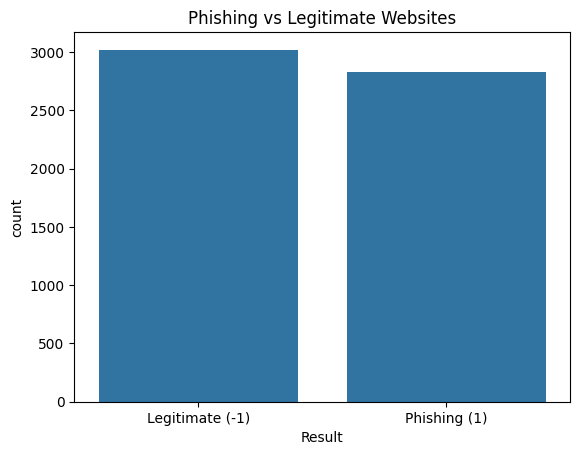


Feature statistics:
        having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        5849.000000  5849.000000         5849.000000       5849.000000   
mean            0.132843    -0.616003            0.720294          0.588648   
std             0.991222     0.777323            0.693728          0.808459   
min            -1.000000    -1.000000           -1.000000         -1.000000   
25%            -1.000000    -1.000000            1.000000          1.000000   
50%             1.000000    -1.000000            1.000000          1.000000   
75%             1.000000    -1.000000            1.000000          1.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               5849.000000    5849.000000        5849.000000   
mean                   0.718242      -0.760301           0.065823   
std                    0.695852       0.649627           0.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Step 1: Load the cleaned dataset
df = pd.read_csv("dataset/phishing_combined.csv")

# 🔹 Step 2: Basic info
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head())

# 🔹 Step 3: Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# 🔹 Step 4: Check for duplicates
print("\nDuplicate rows:", df.duplicated().sum())

# Optionally remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)

# 🔹 Step 5: Analyze target distribution
print("\nTarget (Result) value counts:\n", df['Result'].value_counts())

# Visualize class balance
sns.countplot(x='Result', data=df)
plt.title("Phishing vs Legitimate Websites")
plt.xticks(ticks=[0,1], labels=['Legitimate (-1)', 'Phishing (1)'])
plt.show()

# 🔹 Step 6: Quick feature stats
print("\nFeature statistics:\n", df.describe())


In [11]:
import pandas as pd

df = pd.read_csv("dataset/phishing_combined.csv")

# Check columns
print(df.columns.tolist())

# Define features (exclude target)
X = df.drop(columns=['Result'])  # 'Result' is the label
y = df['Result']

print("Feature set shape:", X.shape)
print("Target distribution:\n", y.value_counts())


['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']
Feature set shape: (22109, 30)
Target distribution:
 Result
 1    12314
-1     9795
Name: count, dtype: int64


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Optional
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 🔹 Load feature-engineered dataset
df = pd.read_csv("dataset/phishing_combined.csv")

# 🔹 Define features (X) and target (y)
X = df.drop(columns=['Result'])
y = df['Result']

# 🔹 Split dataset: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)  # Optional
}

# 🔹 Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Precision:", round(precision_score(y_test, y_pred, pos_label=1), 4))
    print("Recall:", round(recall_score(y_test, y_pred, pos_label=1), 4))
    print("F1-Score:", round(f1_score(y_test, y_pred, pos_label=1), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print()




--- LogisticRegression ---
Accuracy: 0.9313
Precision: 0.9289
Recall: 0.9492
F1-Score: 0.939
Confusion Matrix:
 [[1780  179]
 [ 125 2338]]

--- DecisionTree ---
Accuracy: 0.9819
Precision: 0.981
Recall: 0.9866
F1-Score: 0.9838
Confusion Matrix:
 [[1912   47]
 [  33 2430]]

--- RandomForest ---
Accuracy: 0.986
Precision: 0.9843
Recall: 0.9907
F1-Score: 0.9875
Confusion Matrix:
 [[1920   39]
 [  23 2440]]

--- SVM ---
Accuracy: 0.9306
Precision: 0.9285
Recall: 0.9484
F1-Score: 0.9383
Confusion Matrix:
 [[1779  180]
 [ 127 2336]]



In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import pickle

# 🔹 Load dataset
df = pd.read_csv("dataset/phishing_combined.csv")

X = df.drop(columns=['Result'])
y = df['Result']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define models
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42)
}

best_model = None
best_model_name = ""
best_f1 = 0

# Train, evaluate, and select best model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = f1_score(y_test, y_pred, pos_label=1)  # Focus on phishing detection
    print(f"{name} F1-score: {round(score,4)}")
    
    if score > best_f1:
        best_f1 = score
        best_model = model
        best_model_name = name

print(f"\n✅ Best model: {best_model_name} with F1-score = {round(best_f1,4)}")

# Save the best model
with open("phishing_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

print("✅ Best model saved as phishing_model.pkl")


LogisticRegression F1-score: 0.939
DecisionTree F1-score: 0.9838
RandomForest F1-score: 0.9875
SVM F1-score: 0.9383

✅ Best model: RandomForest with F1-score = 0.9875
✅ Best model saved as phishing_model.pkl


Unified dataset saved as phishing_combined.csv


C:\Users\Hani Ravindra\Downloads\phishing-detector\exploration.py:78: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_value)


Cleaned dataset saved ✅
Shape: (5849, 31)

Columns: ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']

Data types:
 having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_

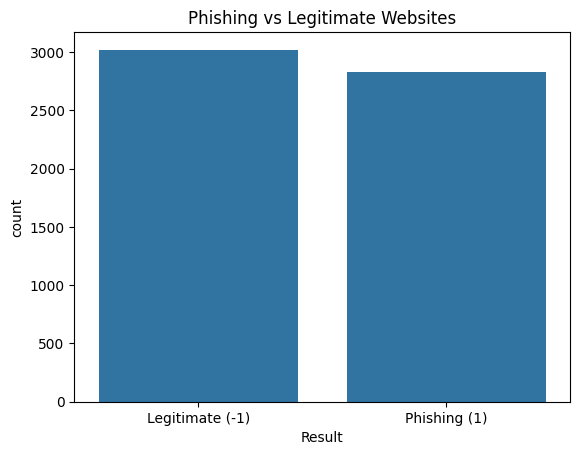


Feature statistics:
        having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        5849.000000  5849.000000         5849.000000       5849.000000   
mean            0.132843    -0.616003            0.720294          0.588648   
std             0.991222     0.777323            0.693728          0.808459   
min            -1.000000    -1.000000           -1.000000         -1.000000   
25%            -1.000000    -1.000000            1.000000          1.000000   
50%             1.000000    -1.000000            1.000000          1.000000   
75%             1.000000    -1.000000            1.000000          1.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               5849.000000    5849.000000        5849.000000   
mean                   0.718242      -0.760301           0.065823   
std                    0.695852       0.649627           0.

In [14]:
%run exploration.py


✅ Best Model Evaluation Metrics:
Accuracy:  0.9419
Precision: 0.9368
Recall:    0.9435
F1-Score:  0.9401

Confusion Matrix:
 [[568  36]
 [ 32 534]]


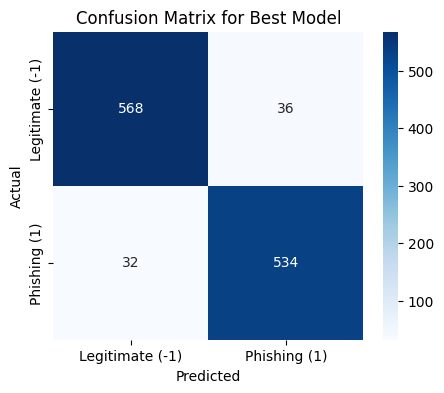

In [15]:
# -------------------------
# Step 2: Model Evaluation for saved best model
# -------------------------

import pandas as pd
import pickle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔹 Load the cleaned dataset
df = pd.read_csv("dataset/phishing_combined.csv")
X = df.drop(columns=['Result'])
y = df['Result']

# 🔹 Split into training/testing sets (same as before for consistency)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 🔹 Load the saved best model
with open("phishing_model.pkl", "rb") as f:
    best_model = pickle.load(f)

# 🔹 Make predictions
y_pred = best_model.predict(X_test)

# 🔹 Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)
recall = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
cm = confusion_matrix(y_test, y_pred)

# 🔹 Print metrics
print("✅ Best Model Evaluation Metrics:")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")
print("\nConfusion Matrix:\n", cm)

# 🔹 Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Legitimate (-1)', 'Phishing (1)'], 
            yticklabels=['Legitimate (-1)', 'Phishing (1)'])
plt.title("Confusion Matrix for Best Model")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


Unified dataset saved as phishing_combined.csv


C:\Users\Hani Ravindra\Downloads\phishing-detector\exploration.py:75: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_value)


Cleaned dataset saved ✅
Shape: (5849, 31)

Columns: ['having_IP_Address', 'URL_Length', 'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State', 'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token', 'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH', 'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover', 'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page', 'Statistical_report', 'Result']

Data types:
 having_IP_Address              int64
URL_Length                     int64
Shortining_Service             int64
having_At_Symbol               int64
double_slash_redirecting       int64
Prefix_Suffix                  int64
having_Sub_Domain              int64
SSLfinal_State                 int64
Domain_registeration_length    int64
Favicon                        int64
port                           int64
HTTPS_

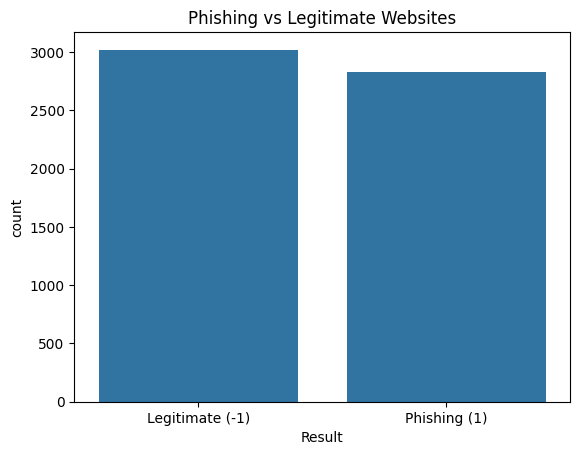


Feature statistics:
        having_IP_Address   URL_Length  Shortining_Service  having_At_Symbol  \
count        5849.000000  5849.000000         5849.000000       5849.000000   
mean            0.132843    -0.616003            0.720294          0.588648   
std             0.991222     0.777323            0.693728          0.808459   
min            -1.000000    -1.000000           -1.000000         -1.000000   
25%            -1.000000    -1.000000            1.000000          1.000000   
50%             1.000000    -1.000000            1.000000          1.000000   
75%             1.000000    -1.000000            1.000000          1.000000   
max             1.000000     1.000000            1.000000          1.000000   

       double_slash_redirecting  Prefix_Suffix  having_Sub_Domain  \
count               5849.000000    5849.000000        5849.000000   
mean                   0.718242      -0.760301           0.065823   
std                    0.695852       0.649627           0.

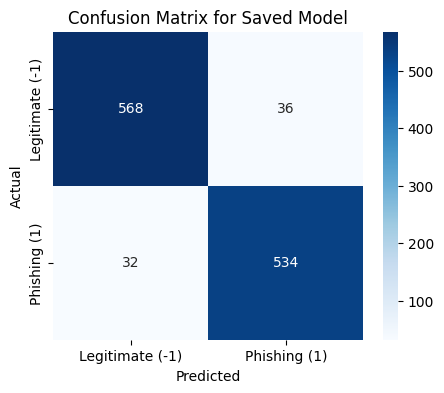

In [17]:
%run exploration.py


In [2]:
import pandas as pd
import json

df = pd.read_csv("dataset/phishing_combined.csv")

# pick first phishing and first legitimate rows (change .iloc[0] if you want different ones)
phish_row = df[df['Result'] == 1].iloc[0].drop('Result').tolist()
legit_row = df[df['Result'] == -1].iloc[0].drop('Result').tolist()

# sanity check
print("Features length:", len(phish_row), len(legit_row))

phish_json = json.dumps({"features": phish_row}, ensure_ascii=False)
legit_json  = json.dumps({"features": legit_row}, ensure_ascii=False)

print("\n--- Phishing JSON ---\n")
print(phish_json)
print("\n--- Legitimate JSON ---\n")
print(legit_json)


Features length: 30 30

--- Phishing JSON ---

{"features": [1, 0, -1, 1, 1, -1, 1, 1, -1, 1, 1, 1, 1, 0, 0, -1, 1, 1, 0, -1, 1, -1, 1, -1, -1, 0, -1, 1, 1, 1]}

--- Legitimate JSON ---

{"features": [-1, 1, 1, 1, -1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, 0, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1]}


In [5]:
# debug_predict.py
import pickle
import numpy as np

model = pickle.load(open("phishing_model.pkl", "rb"))

arr = np.array([-1, -1, -1, -1, -1, 1, 0, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])  # shape (30,)
print("shape:", arr.shape)
pred = model.predict(arr.reshape(1, -1))[0]
proba = None
if hasattr(model, "predict_proba"):
    proba = model.predict_proba(arr.reshape(1, -1))
print("prediction:", pred, "prob:", proba)


shape: (30,)
prediction: -1 prob: [[0.55 0.45]]


c:\Users\Hani Ravindra\Downloads\phishing-detector\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Hani Ravindra\Downloads\phishing-detector\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
